In [1]:
import pandas as pd
from pprint import pprint
import numpy as np
import json
import os
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns

plt.rc('figure', dpi=150)

SMALL_SIZE=17
MEDIUM_SIZE=17
BIGGER_SIZE=17

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE+5)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

SAVING = True

In [27]:
EXPERIMENTS_PATH = '../logs/experiments/'
FIRST_DATE = datetime(2019, 12, 1)
experiment_files = [e for e in os.listdir(EXPERIMENTS_PATH) if 'experiment' in e]
experiments = []
cities = ['aleppo', 'damascus', 'daraa', 'idlib', 'homs', 'hama', 'raqqa']
for experiment in experiment_files:
    with open(f'{EXPERIMENTS_PATH}/{experiment}', 'rb') as f:
        try:
            _json = json.load(f).replace('nan', '"nan"').replace('ResourceExhaustedError()', '"exhausted"')
            _json = eval(_json)#)
            _json['name'] = experiment
            if experiment != experiment:
                print(_json)
            for city in cities:
                _json[f'contains_{city}'] = city in _json['features']
            experiments.append(_json)
        except Exception as e:
            print(f'Problem loading file {experiment}')
            print(e)
            
experiments = pd.DataFrame(experiments)
experiments['datetime'] = experiments['name'].apply(lambda x: datetime.fromtimestamp(int(x.split('_')[1].split('.')[0])))
experiments = experiments.loc[experiments['datetime'] >= FIRST_DATE]
experiments = experiments.set_index('datetime')
#columns_to_mean = ['loss', 'precision_positives', 'precision_negatives', 'recall_positives', 'recall_negatives']
#for col in columns_to_mean:
#    experiments[f'{col}_last_epoch'] = experiments[col].apply(lambda x: np.nan if isinstance(x, float) else x[-1])
#    experiments[f'val_{col}_last_epoch'] = experiments[f'val_{col}'].apply(lambda x: np.nan if isinstance(x, float) else x[-1])
    
spaces = pd.DataFrame(experiments['space'].tolist(), index=experiments.index)
experiments = experiments.join(spaces).sort_index(ascending=False)
experiments = experiments.loc[experiments['epochs'] > 1] # In case some test experiments went through
#experiments['class_weight'] = experiments['class_weight'].apply(lambda x: x[1])
experiments['n_layers'] = experiments['convolutional_layers'].apply(len)
experiments['dropout'] = experiments['convolutional_layers'].apply(lambda x: x[0]['dropout'] if x else np.nan)
experiments['filters_first_layer'] = experiments['convolutional_layers'].apply(lambda x: x[0]['filters'] if x else np.nan)
experiments['n_filters'] = experiments['convolutional_layers'].apply(lambda x: sum(layer['filters'] for layer in x))
experiments['activation'] = experiments['convolutional_layers'].apply(lambda x: x[0]['activation'] if x else np.nan)
experiments['weight_1'] = experiments['class_weight'].apply(lambda x: x[1])
#experiments = experiments.loc[experiments['model'] == "<class 'damage.models.cnn.CNN'>"]
metrics = ['recall_val', 'roc_auc_val', 'precision_val']
print(experiments.shape)
experiments.head()

Problem loading file experiment_1563989071.json
Expecting value: line 1 column 1 (char 0)
Problem loading file experiment_1563215470.json
Expecting value: line 1 column 1 (char 0)
Problem loading file experiment_1563989070.json
Expecting value: line 1 column 1 (char 0)
Problem loading file experiment_1563215472.json
Expecting value: line 1 column 1 (char 0)
Problem loading file experiment_1561488793.json
Expecting value: line 1 column 1 (char 0)
(7, 59)


,accuracy,augment_brightness,augment_flip,batch_size_test,contains_aleppo,contains_damascus,contains_daraa,contains_hama,contains_homs,contains_idlib,...,layer_type,learning_rate,prop_1_to_0,prop_1_train,n_layers,dropout,filters_first_layer,n_filters,activation,weight_1
datetime,,,,,,,,,,,,,,,,,,,,,
2019-12-05 12:42:44,"[0.57304716, 0.5879747, 0.59612066, 0.6082829,...",NaN,NaN,200.0,True,False,False,False,False,False,...,cnn,0.868511,0.3,0.230769,2,0.255556,128,384,relu,0.769220
2019-12-05 01:04:37,"[0.5744219, 0.5597245, 0.58212256, 0.6062826, ...",NaN,NaN,200.0,True,False,False,False,False,False,...,cnn,0.868511,0.3,0.230769,2,0.255556,128,384,relu,0.769268
2019-12-04 13:29:56,"[0.5957272, 0.5413014, 0.5523797, 0.6198684, 0...",NaN,NaN,200.0,True,False,False,False,False,False,...,cnn,0.868511,0.3,0.230769,2,0.255556,128,384,relu,0.769107
2019-12-04 01:55:51,"[0.5354783, 0.53662276, 0.5634211, 0.5739864, ...",NaN,NaN,200.0,True,False,False,False,False,False,...,cnn,0.868511,0.3,0.230769,2,0.255556,128,384,relu,0.769643
2019-12-03 07:43:18,"[0.5776076, 0.56302714, 0.5900012, 0.59978324,...",NaN,NaN,200.0,True,False,False,False,False,False,...,cnn,0.868511,0.3,0.230769,2,0.255556,128,384,relu,0.767857


In [8]:
experiments.head(14)[metrics + ['name']]

,recall_val,roc_auc_val,precision_val,name
datetime,,,,
2019-12-05 12:42:44,0.935722,0.840722,0.0314045,experiment_1575546164.json
2019-12-05 01:04:37,0.958824,0.819116,0.0298023,experiment_1575504277.json
2019-12-04 13:29:56,0.813348,0.844890,0.0454934,experiment_1575462596.json
2019-12-04 01:55:51,0.977400,0.840427,0.0248535,experiment_1575420951.json
2019-12-03 07:43:18,0.942282,0.851051,0.0302544,experiment_1575355398.json
2019-12-02 05:31:37,0.965870,0.792398,0.0244509,experiment_1575261097.json
2019-12-01 23:15:48,0.430758,0.802527,0.0772605,experiment_1575238548.json


In [9]:
experiments.nlargest(10, 'roc_auc_val')[metrics]

,recall_val,roc_auc_val,precision_val
datetime,,,
2019-12-03 07:43:18,0.942282,0.851051,0.0302544
2019-12-04 13:29:56,0.813348,0.844890,0.0454934
2019-12-05 12:42:44,0.935722,0.840722,0.0314045
2019-12-04 01:55:51,0.977400,0.840427,0.0248535
2019-12-05 01:04:37,0.958824,0.819116,0.0298023
2019-12-01 23:15:48,0.430758,0.802527,0.0772605
2019-12-02 05:31:37,0.965870,0.792398,0.0244509


In [10]:
experiments.nlargest(10, 'roc_auc_val')[['filters_first_layer', 'n_filters', 'n_layers', 'dense_units', 'weight_1']]

,filters_first_layer,n_filters,n_layers,dense_units,weight_1
datetime,,,,,
2019-12-03 07:43:18,128,384,2,256,0.767857
2019-12-04 13:29:56,128,384,2,256,0.769107
2019-12-05 12:42:44,128,384,2,256,0.769220
2019-12-04 01:55:51,128,384,2,256,0.769643
2019-12-05 01:04:37,128,384,2,256,0.769268
2019-12-01 23:15:48,128,384,2,256,0.767857
2019-12-02 05:31:37,128,384,2,256,0.767857


In [12]:
experiments_highest_auc = experiments.loc[experiments['roc_auc_val'].idxmax()]
print(experiments_highest_auc['name'])
print(experiments_highest_auc[metrics])
pprint(experiments_highest_auc['space'])

experiment_1575355398.json
recall_val        0.942282
roc_auc_val       0.851051
precision_val    0.0302544
Name: 2019-12-03 07:43:18, dtype: object
{'batch_size': 100,
 'class_weight': {0: 0.1, 1: 0.7678566938775511},
 'convolutional_layers': [{'activation': 'relu',
                           'dropout': 0.25555555555555554,
                           'filters': 128,
                           'kernel_size': [9, 9],
                           'pool_size': [8, 8]},
                          {'activation': 'relu',
                           'dropout': 0.25555555555555554,
                           'filters': 256,
                           'kernel_size': [9, 9],
                           'pool_size': [8, 8]}],
 'dense_units': 256,
 'epochs': 8,
 'layer_type': 'cnn',
 'learning_rate': 0.868511373751352,
 'prop_1_to_0': 0.3,
 'prop_1_train': 0.23076904578298574}


/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

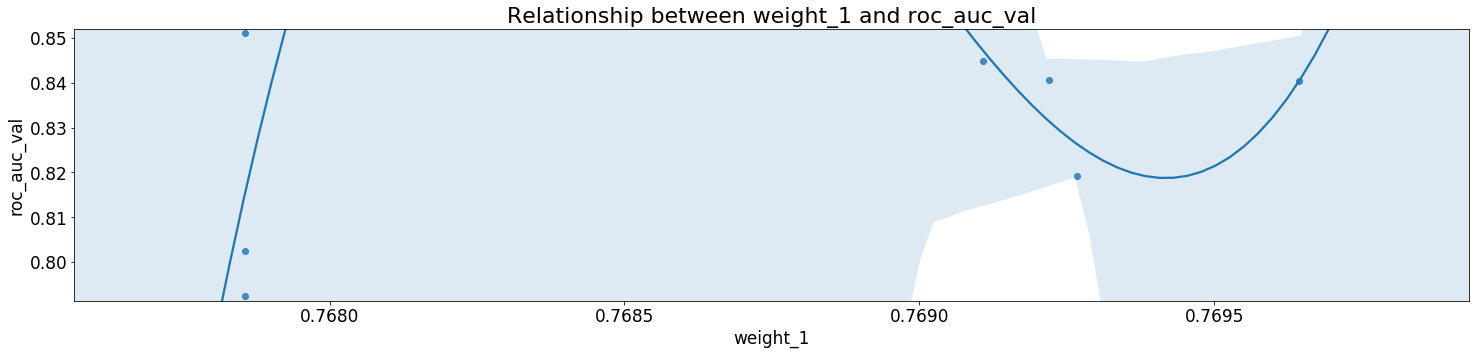

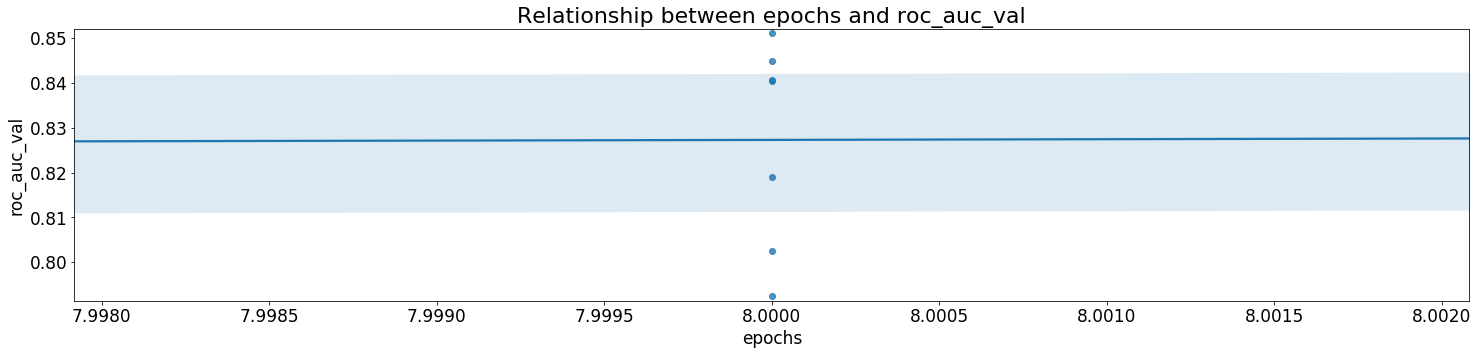

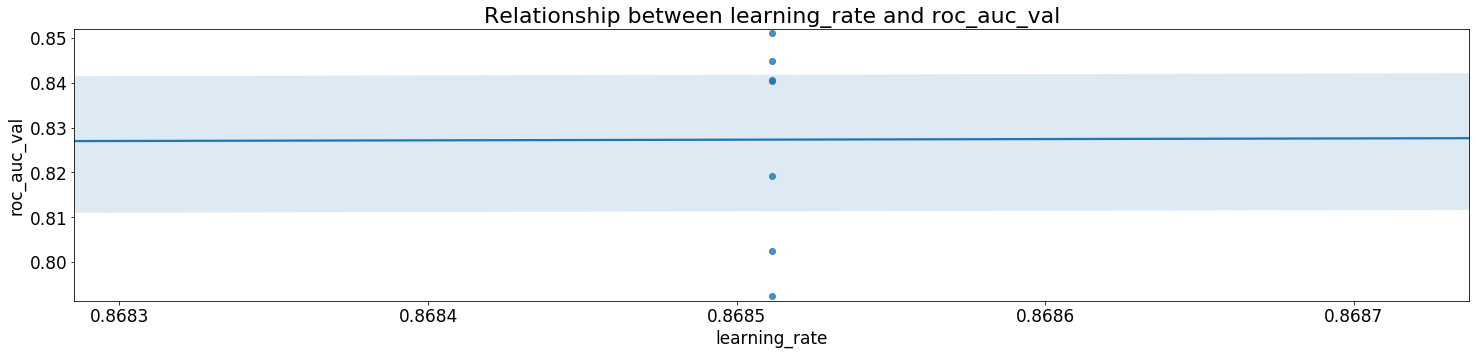

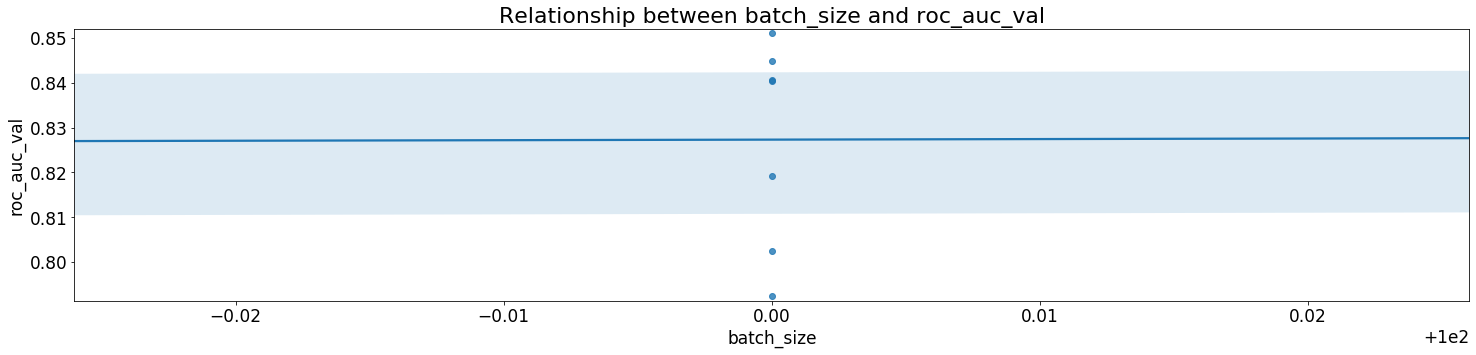

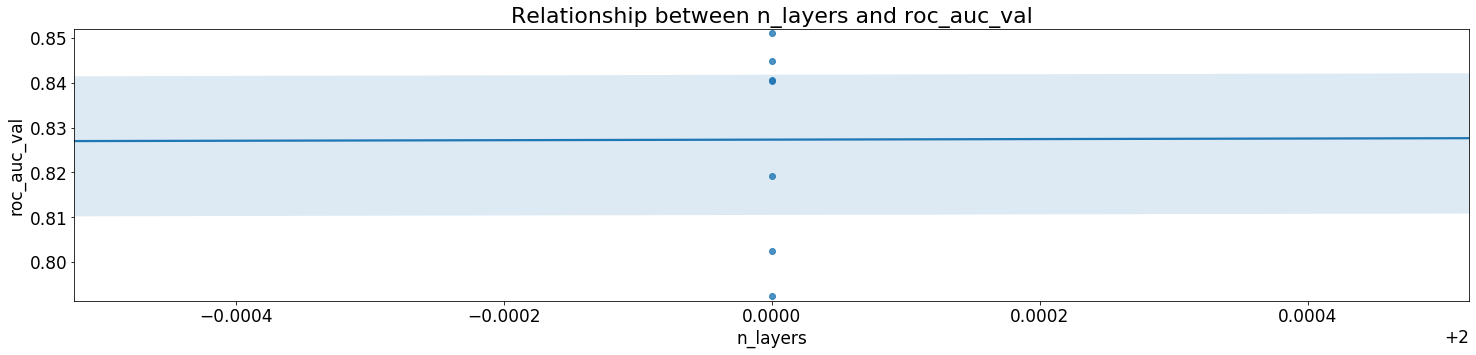

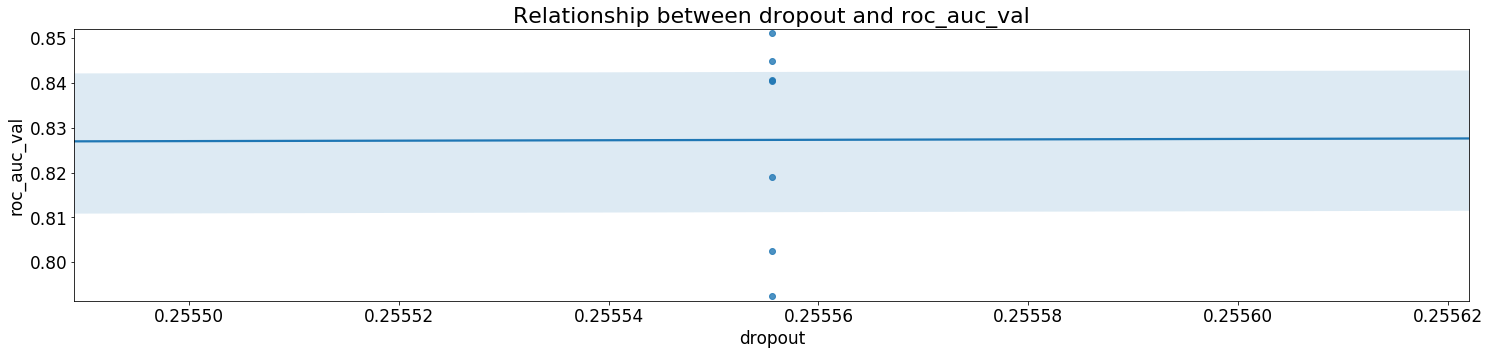

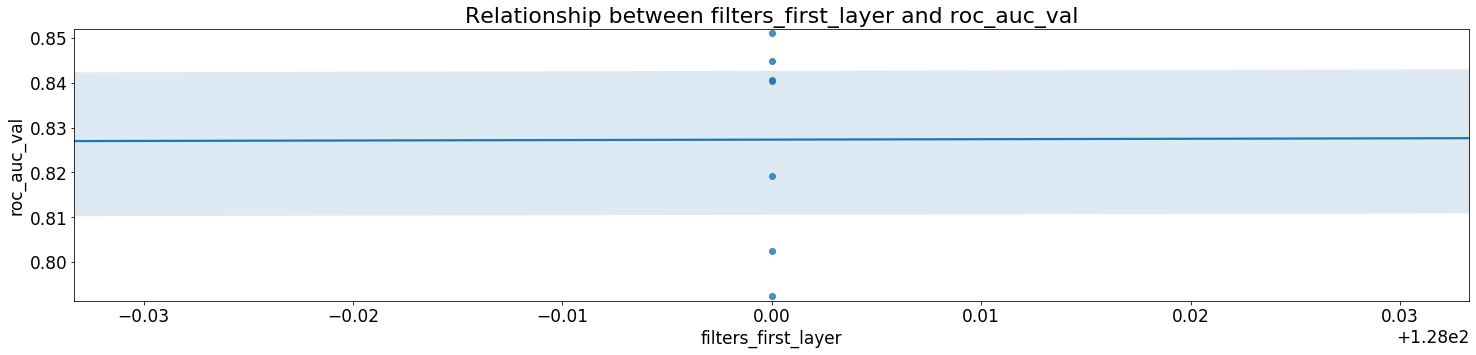

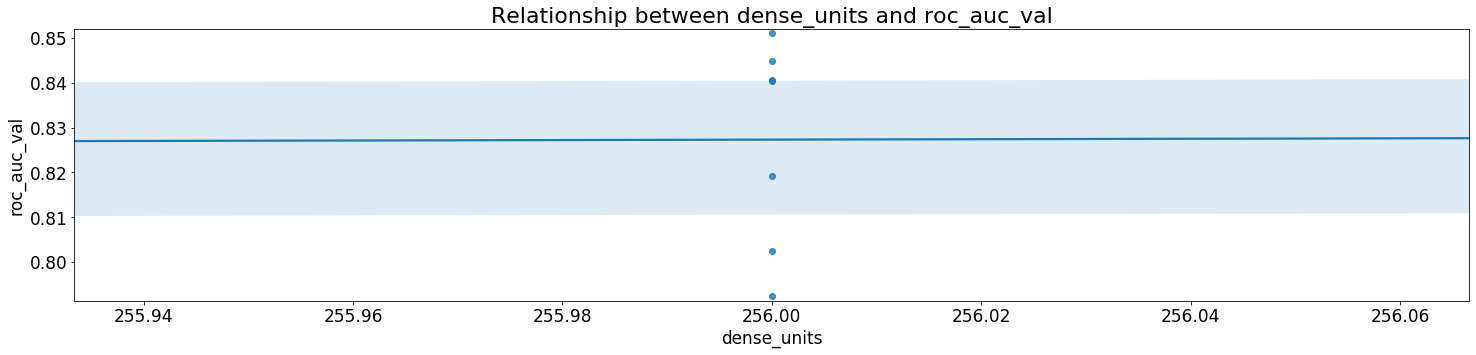

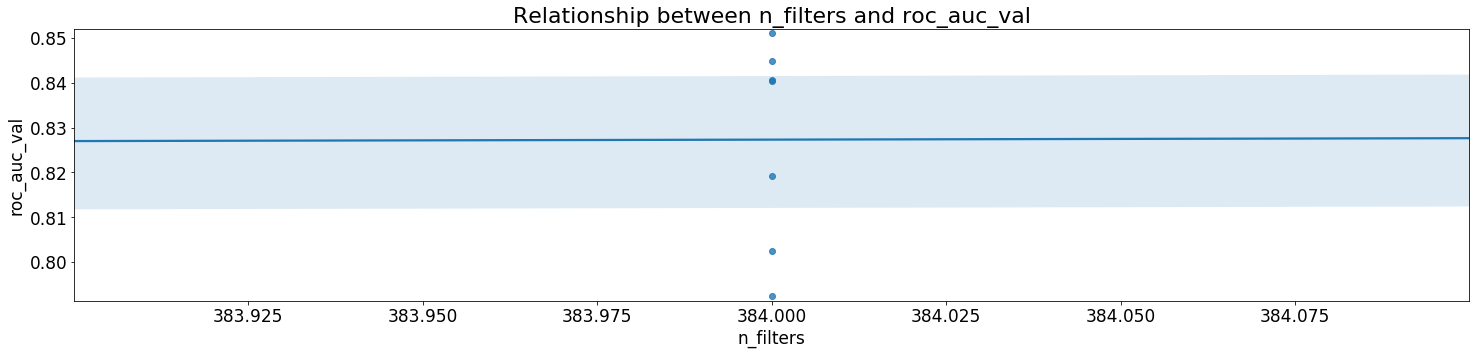

In [13]:
parameters = ['weight_1', 'epochs', 'learning_rate', 'batch_size', 'n_layers',
              'dropout', 'filters_first_layer', 'dense_units', 'n_filters']
metric = 'roc_auc_val'
for parameter in parameters:
    fig, ax = plt.subplots(figsize=(25, 5))
    _experiments = experiments[[parameter, metric]].dropna()
    sns.regplot(_experiments[parameter], _experiments[metric], order=3)
    ax.set_ylim(_experiments[metric].min()-0.001, _experiments[metric].max()+0.001)
    ax.set_title(f'Relationship between {parameter} and {metric}')

Count of experiments per activation type {'relu': 7}


Text(0.5, 1.0, 'Average roc_auc_val by activation function')

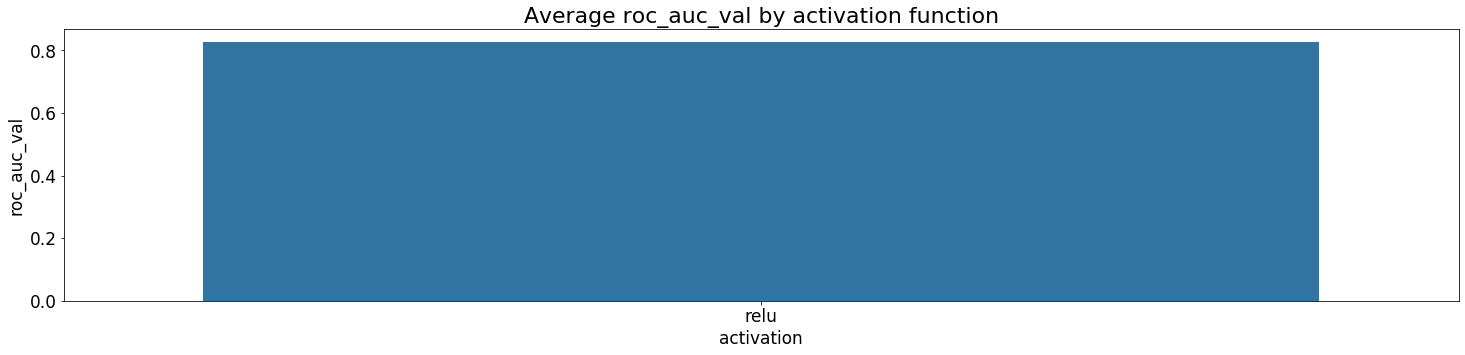

In [15]:
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per activation type', experiments.groupby('activation')[metric].count().to_dict())
sns.barplot(
    x=experiments.groupby('activation')[metric].mean().index,
    y=experiments.groupby('activation')[metric].mean(),
    ax=ax
)

ax.set_title(f'Average {metric} by activation function')

Count of experiments per activation type {'relu': 7}


Text(0.5, 1.0, 'Best roc_auc_val by activation function')

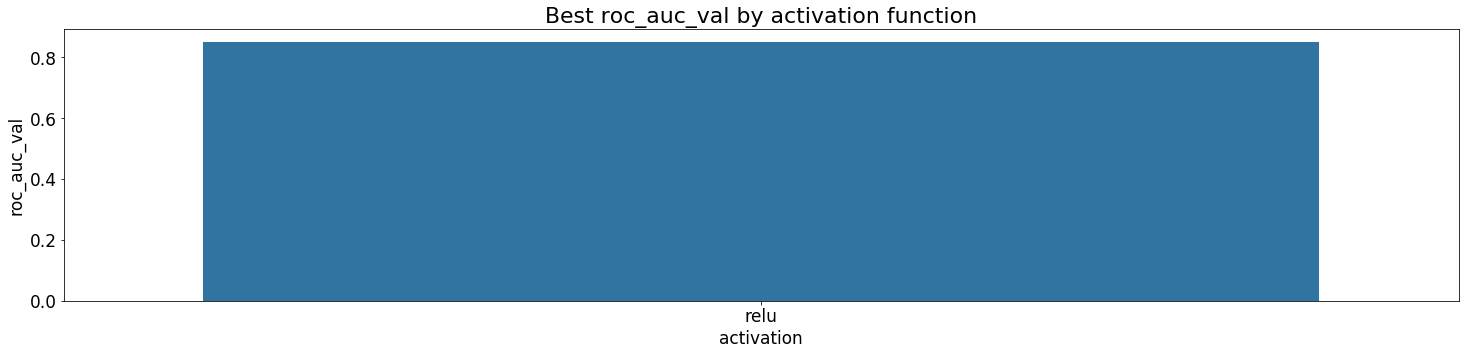

In [16]:
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per activation type', experiments.groupby('activation')[metric].count().to_dict())
sns.barplot(
    x=experiments.groupby('activation')[metric].max().index,
    y=experiments.groupby('activation')[metric].max(),
    ax=ax
)
ax.set_title(f'Best {metric} by activation function')

Count of experiments per layer type {'cnn': 7}


Text(0.5, 1.0, 'Average roc_auc_val by layer type')

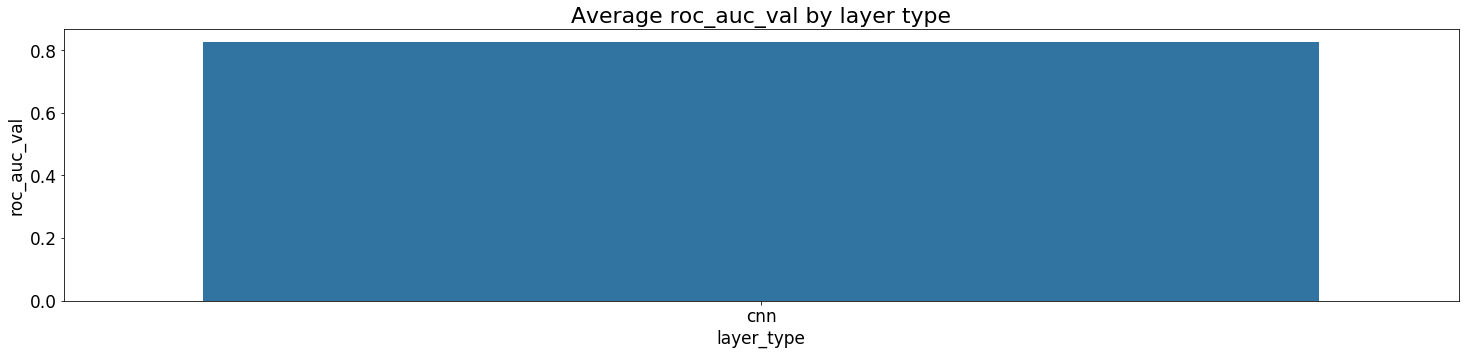

In [17]:
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per layer type', experiments.groupby('layer_type')[metric].count().to_dict())
sns.barplot(
    x=experiments.groupby('layer_type')[metric].mean().index,
    y=experiments.groupby('layer_type')[metric].mean(),
    ax=ax
)
ax.set_title(f'Average {metric} by layer type')

Count of experiments per layer type {'cnn': 7}


Text(0.5, 1.0, 'Best roc_auc_val by layer type')

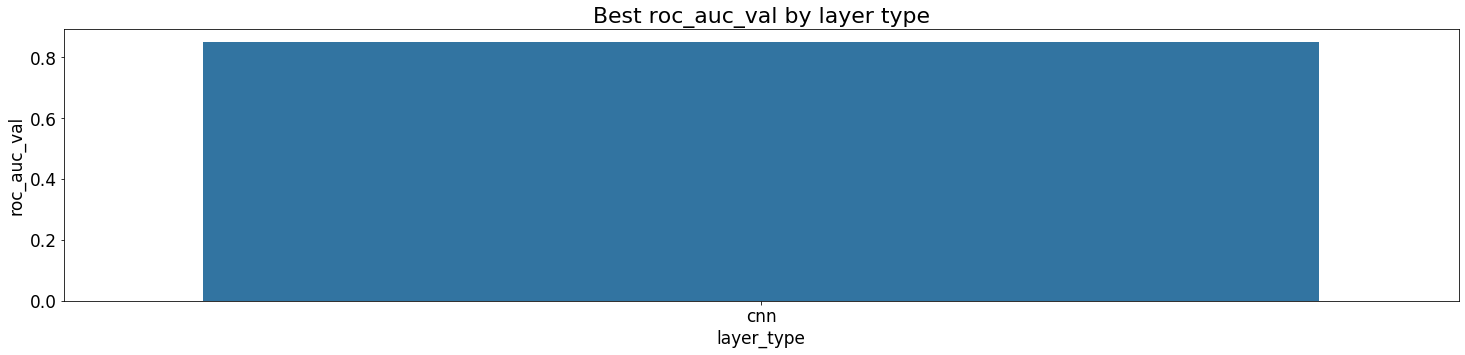

In [18]:
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per layer type', experiments.groupby('layer_type')[metric].count().to_dict())
sns.barplot(
    x=experiments.groupby('layer_type')[metric].max().index,
    y=experiments.groupby('layer_type')[metric].max(),
    ax=ax
)
ax.set_title(f'Best {metric} by layer type')

Count of experiments per activation type {}


ValueError: min() arg is an empty sequence

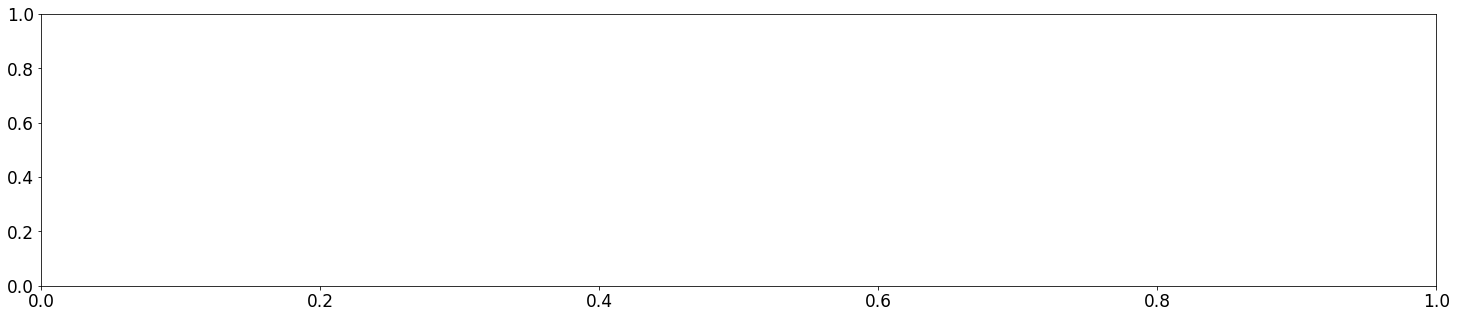

In [20]:
key = 'augment_brightness'
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per activation type', experiments.groupby(key)[metric].count().to_dict())
sns.barplot(
    x=experiments.groupby(key)[metric].mean().index,
    y=experiments.groupby(key)[metric].mean(),
    ax=ax
)

ax.set_title(f'Average {metric} by {key}')

Count of experiments per augment brightness {}


ValueError: min() arg is an empty sequence

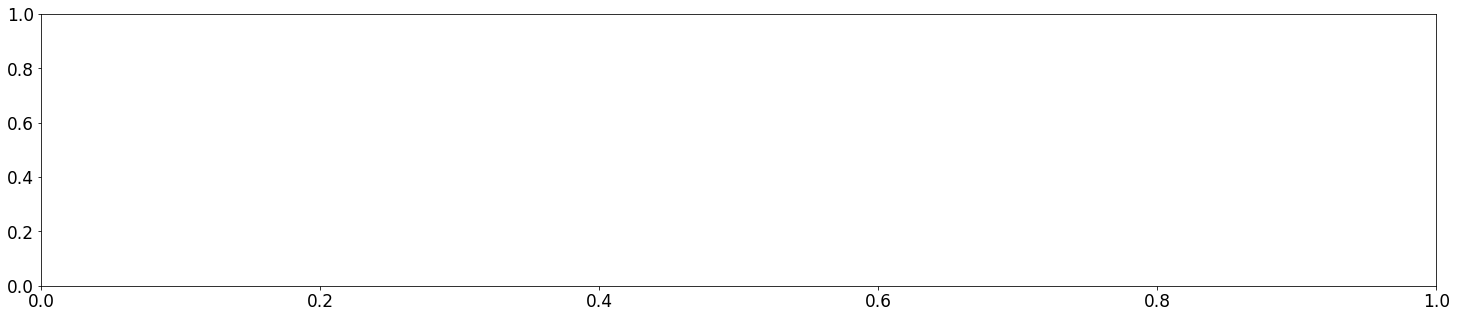

In [21]:
key = 'augment_brightness'
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per augment brightness', experiments.groupby(key)[metric].count().to_dict())
sns.barplot(
    x=experiments.groupby(key)[metric].max().index,
    y=experiments.groupby(key)[metric].max(),
    ax=ax
)

ax.set_title(f'Average {metric} by {key}')

Count of experiments per augment flip {}


ValueError: min() arg is an empty sequence

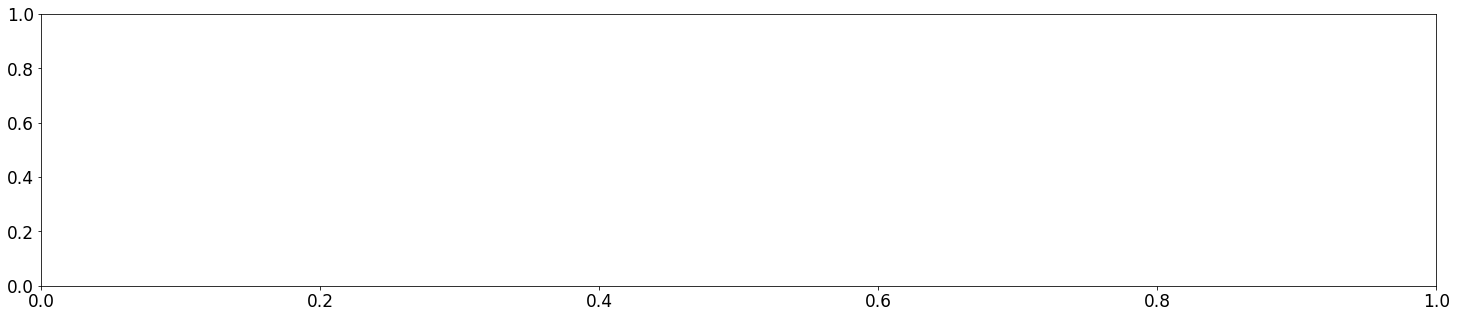

In [22]:
key = 'augment_flip'
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per augment flip', experiments.groupby(key)[metric].count().to_dict())
sns.barplot(
    x=experiments.groupby(key)[metric].mean().index,
    y=experiments.groupby(key)[metric].mean(), ax=ax
)

ax.set_title(f'Average {metric} by {key}')

Count of experiments per activation type {}


ValueError: min() arg is an empty sequence

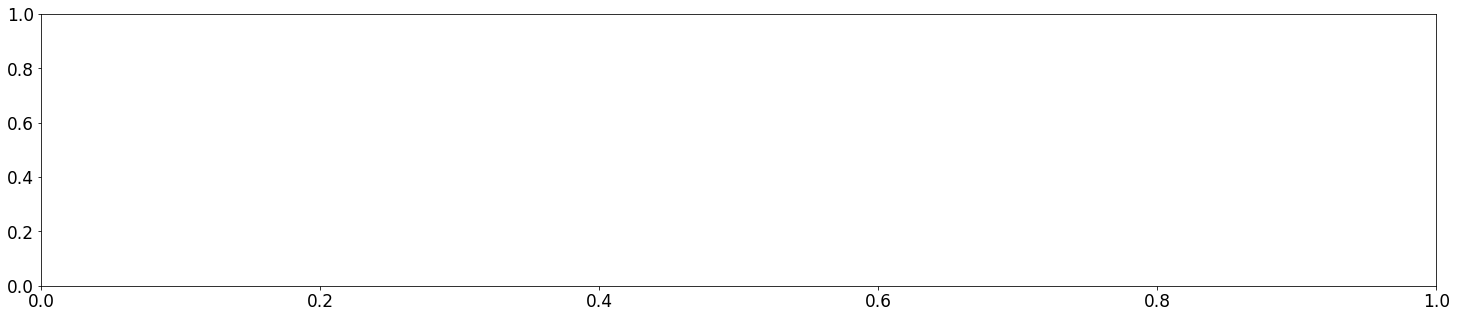

In [23]:
key = 'augment_flip'
fig, ax = plt.subplots(figsize=(25, 5))
print('Count of experiments per activation type', experiments.groupby(key)[metric].count().to_dict())
sns.barplot(
    x=experiments.groupby(key)[metric].max().index,
    y=experiments.groupby(key)[metric].max(), ax=ax
)

ax.set_title(f'Average {metric} by {key}')

Text(0.5, 1.0, 'Relationship between weight to positives and recall positives')

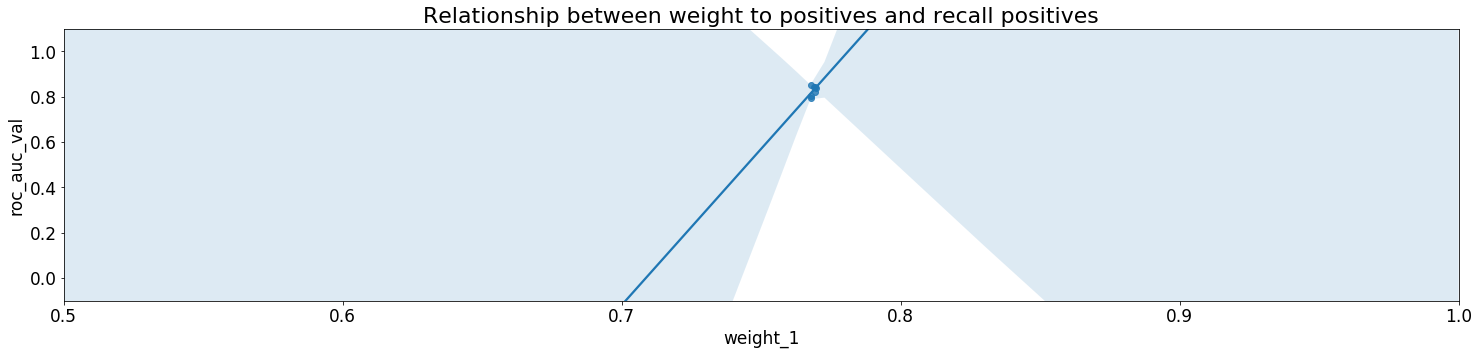

In [24]:
fig, ax = plt.subplots(figsize=(25, 5))
_experiments = experiments.loc[experiments['weight_1'] != 0.655]
ax.set_xlim(0.5, 1)
ax.set_ylim(-0.1, 1.1)
sns.regplot(_experiments['weight_1'], _experiments['roc_auc_val'], order=1)
ax.set_title(f'Relationship between weight to positives and recall positives')

/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/Users/javiermas/py3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly condition

Text(0.5, 1.0, 'Relationship between weight to positives and custom metric')

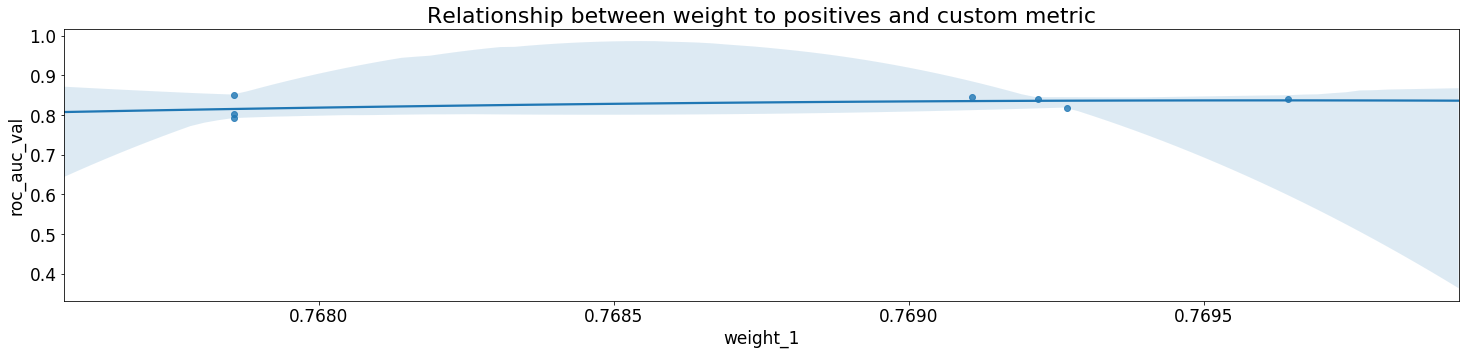

In [25]:
fig, ax = plt.subplots(figsize=(25, 5))
_experiments = experiments.loc[experiments['weight_1'] != 0.655]
#ax.set_xlim(0.5, 1)
#ax.set_ylim(-0.1, 1)
sns.regplot(_experiments['weight_1'], _experiments[metric], order=2)
ax.set_title(f'Relationship between weight to positives and custom metric')

In [18]:
#experiments.to_csv('../figures/figures_to_send/2019_09_07/experiments.csv')